# English premier league project

<m>

## 1. Data wrangling and preparation

<m>

### 1.1 Import and read data

<m>

In [1]:
import pandas as pd
import numpy as np
import janitor as janitor
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns 
import sweetviz as sv
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import openpyxl
import pyarrow
import re
from fuzzywuzzy import fuzz, process
import geopandas as gpd
import warnings as warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sweetviz\config.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  the_open = pkg_resources.open_text("sweetviz", 'sweetviz_defaults.ini')


In [2]:
df=pd.read_excel('all-players-stats.xlsx')

In [3]:
pd.set_option("display.max_rows",None)

In [4]:
df.head()

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,BukayoÂ Saka,Defender/Midfielder,40,3,12,2,6,0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7,1
2,Arsenal,32,AaronÂ Ramsdale,Goalkeeper,37,0,0,0,1,0
3,Arsenal,4,BenÂ White,Defender,37,0,0,0,3,0
4,Arsenal,8,MartinÂ Odegaard,Midfielder,36,4,7,0,4,0


<m>

### 1.2 Understanding data

<m>

report = ydp.ProfileReport(df)
report.to_file("profiling report.html")

report=sv.analyze(df)
report.show_html('profiling report.html')

In [5]:
df.shape

(623, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team           623 non-null    object
 1   JerseyNo       623 non-null    int64 
 2   Player         623 non-null    object
 3   Position       623 non-null    object
 4   Apearances     623 non-null    int64 
 5   Substitutions  623 non-null    int64 
 6   Goals          623 non-null    int64 
 7   Penalties      623 non-null    int64 
 8   YellowCards    623 non-null    int64 
 9   RedCards       623 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 48.8+ KB


In [7]:
df.describe()

,JerseyNo,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,22.597111,16.861958,4.630819,2.245586,0.168539,2.457464,0.086677
std,18.719450,13.950425,4.950411,4.072776,0.787057,2.694708,0.303568
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,16.000000,3.000000,1.000000,0.000000,2.000000,0.000000
75%,30.000000,27.500000,7.000000,3.000000,0.000000,4.000000,0.000000
max,97.000000,54.000000,25.000000,31.000000,9.000000,12.000000,2.000000


In [8]:
df.dtypes

Team             object
JerseyNo          int64
Player           object
Position         object
Apearances        int64
Substitutions     int64
Goals             int64
Penalties         int64
YellowCards       int64
RedCards          int64
dtype: object

In [9]:
df.index

RangeIndex(start=0, stop=623, step=1)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Team             0
JerseyNo         0
Player           0
Position         0
Apearances       0
Substitutions    0
Goals            0
Penalties        0
YellowCards      0
RedCards         0
dtype: int64

<m>

### 1.3 Preparing data

<m>

In [12]:
df.columns

Index(['Team', 'JerseyNo', 'Player', 'Position', 'Apearances', 'Substitutions',
       'Goals', 'Penalties', 'YellowCards', 'RedCards'],
      dtype='object')

In [13]:
new_order=['Player','Team','Position', 'JerseyNo','Goals','Penalties', 'Apearances', 'Substitutions', 'YellowCards', 'RedCards']

In [14]:
df=df[new_order]

In [15]:
df['Team'].unique()

array(['Arsenal', 'Aston Villa', 'Brentford', 'Brighton and Hove Albion',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Norwich City',
       'Southampton', 'Tottenham Hotspur', 'Watford', 'West Ham United',
       'Wolverhampton Wanderers'], dtype=object)

In [16]:
df['Team'].replace('Brighton and Hove Albion','Brighton',inplace=True)

In [17]:
df['Team'].replace('Wolverhampton Wanderers','Wolverhampton',inplace=True)

In [18]:
df['Position'].replace("Defender/Midfielder/Forward","Midfielder",inplace=True)

In [19]:
df['Position'].replace("Defender/Forward","Forward",inplace=True)

In [20]:
df['Position'].unique()

array(['Defender/Midfielder', 'Defender', 'Goalkeeper', 'Midfielder',
       'Forward', 'Midfielder/Forward'], dtype=object)

<m>

#### 1.3.1 Dealing with outliears

##### Z-Score and IQR

<m>

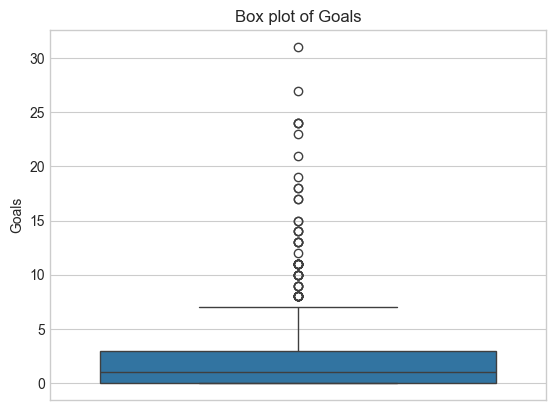

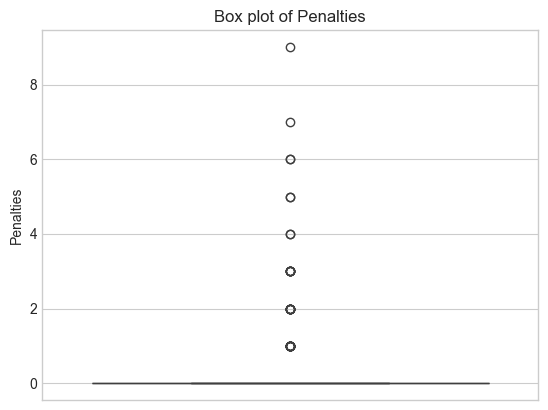

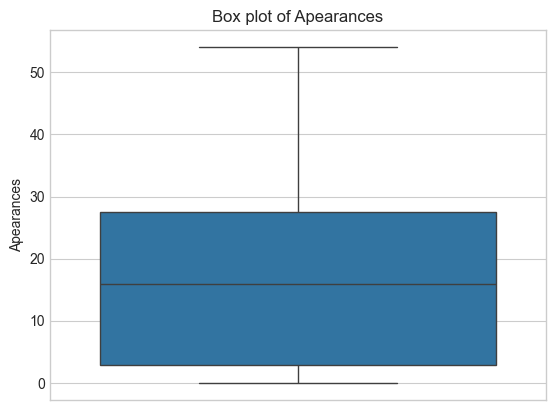

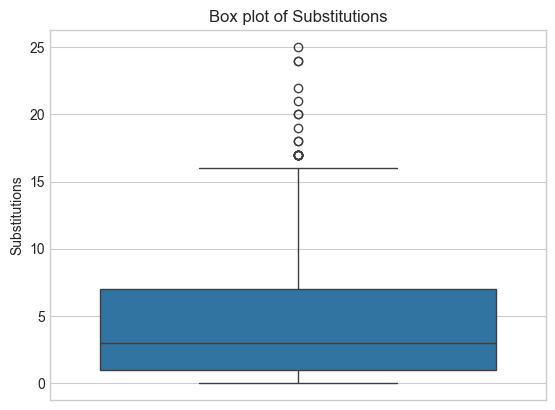

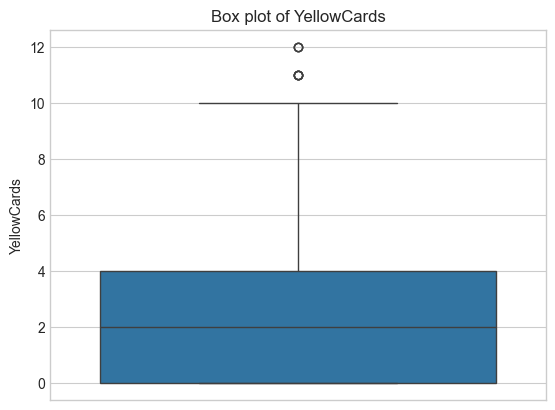

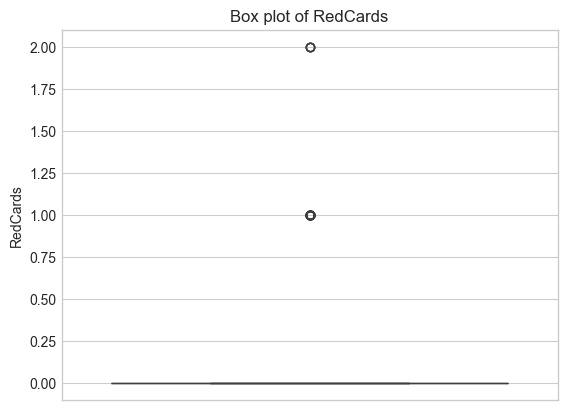

In [21]:
for column in ['Goals','Penalties','Apearances','Substitutions','YellowCards','RedCards']:
         sns.boxplot(df[column])
         plt.title(f'Box plot of {column}')
         plt.show()

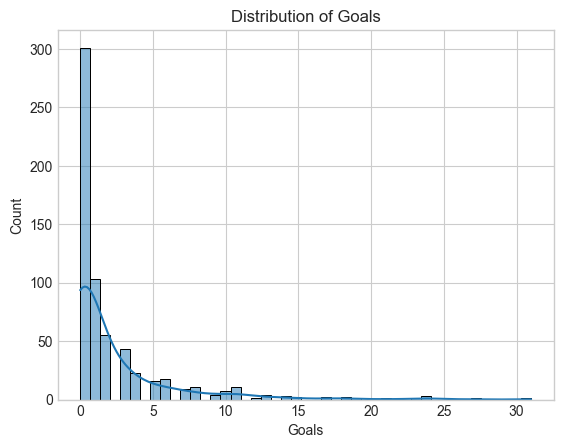

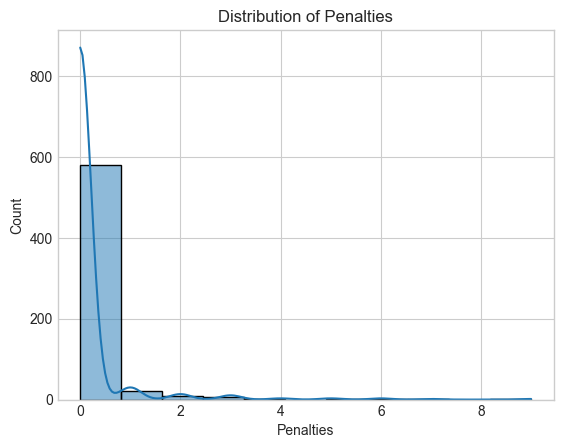

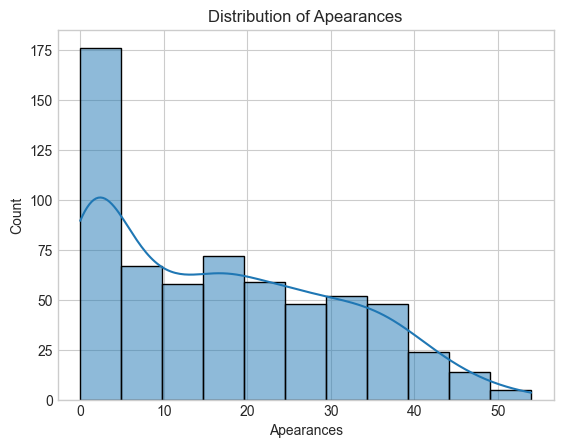

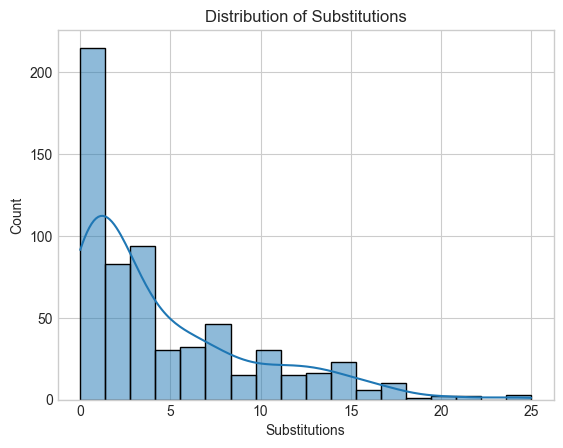

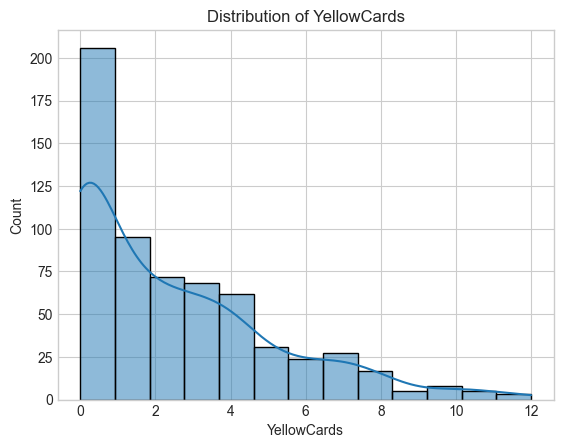

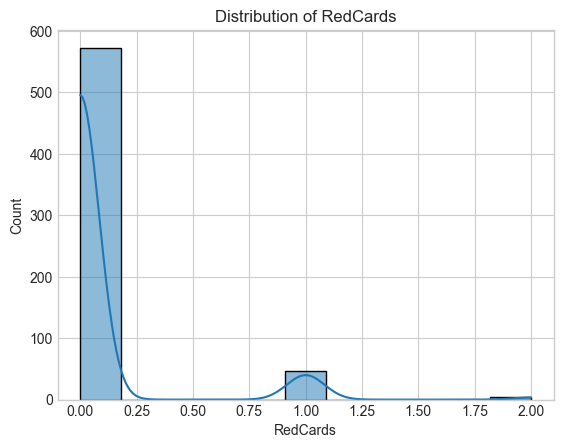

In [22]:
for column in['Goals','Penalties','Apearances','Substitutions','YellowCards','RedCards']:
    sns.histplot(df[column],kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [23]:
df[['Goals','Penalties','Apearances','Substitutions','YellowCards','RedCards']].skew()

Goals            3.151444
Penalties        6.501213
Apearances       0.471593
Substitutions    1.328600
YellowCards      1.190149
RedCards         3.614374
dtype: float64

<m>

##### Z-score

<m>

In [24]:
def calculate_upper_limit(column):
    upper_limit= column.mean()+3*column.std()
    return upper_limit

In [25]:
def calculate_lower_limit(column):
    lower_limit= column.mean()-3*column.std()
    return lower_limit

In [26]:
upper_limit = calculate_upper_limit(df['Apearances'])
lower_limit = calculate_lower_limit(df['Apearances'])
print(f'Upper Limit: {upper_limit}\n Lower Limit: {lower_limit}')

Upper Limit: 58.71323290923338
 Lower Limit: -24.98931637632808


In [27]:
def z_score_outliers(df, column):
    upper_limit = df[column].mean() + 3 * df[column].std()
    lower_limit = df[column].mean() - 3 * df[column].std()
    pd.set_option('display.max_rows',None)
    return df[(df[column] >= upper_limit) | (df[column] <= lower_limit)]

In [28]:
outliers=z_score_outliers(df,'Apearances')
outliers

,Player,Team,Position,JerseyNo,Goals,Penalties,Apearances,Substitutions,YellowCards,RedCards


<m>

##### Clip the max apperances to 38

<m>

In [29]:
df['Apearances']=df['Apearances'].clip(upper=38)

In [30]:
df['Apearances'].unique()

array([38, 37, 36, 29, 26, 24, 23, 21, 17, 16, 14, 13, 11,  8,  4,  3,  2,
        1,  0,  7,  9, 32,  6, 30, 12, 19, 34, 35, 31, 28, 25, 10,  5, 15,
       27, 18, 22, 20, 33], dtype=int64)

<m>

##### IQR

<m>

In [31]:
def IQR_Outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [32]:
def IQR_Outliers_limits(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f'upper_bond=: {upper_bound}\nlower_bound=: {lower_bound}')

In [33]:
outliers=IQR_Outliers(df,'Goals')
outliers

,Player,Team,Position,JerseyNo,Goals,Penalties,Apearances,Substitutions,YellowCards,RedCards
0,BukayoÂ Saka,Arsenal,Defender/Midfielder,7,12,2,38,3,6,0
8,EmileÂ Smith Rowe,Arsenal,Midfielder,10,11,0,24,12,1,0
17,EddieÂ Nketiah,Arsenal,Forward,30,10,0,13,14,3,0
61,OllieÂ Watkins,Aston Villa,Forward,11,11,1,34,2,7,0
67,BryanÂ Mbeumo,Brentford,Midfielder/Forward,19,8,2,35,3,4,0
69,IvanÂ Toney,Brentford,Forward,17,14,6,34,3,8,0
77,YoaneÂ Wissa,Brentford,Midfielder/Forward,11,10,0,16,18,0,0
112,NealÂ Maupay,Brighton,Forward,9,9,1,27,8,7,0
123,LeandroÂ Trossard,Brighton,Midfielder,11,8,1,32,3,2,0
135,MaxwelÂ Cornet,Burnley,Forward,20,9,0,22,6,2,0


In [34]:
IQR_Outliers_limits(df,'Goals')

upper_bond=: 7.5
lower_bound=: -4.5


<m>

### 1.4 Understanding features

#### (Univariant analysis)

##### Destribution of features

<m>

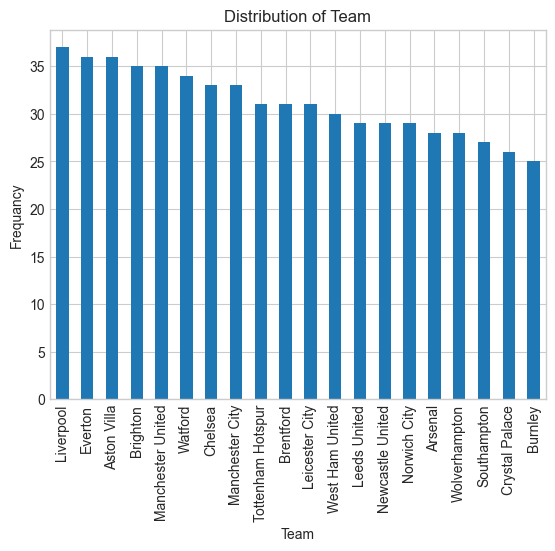

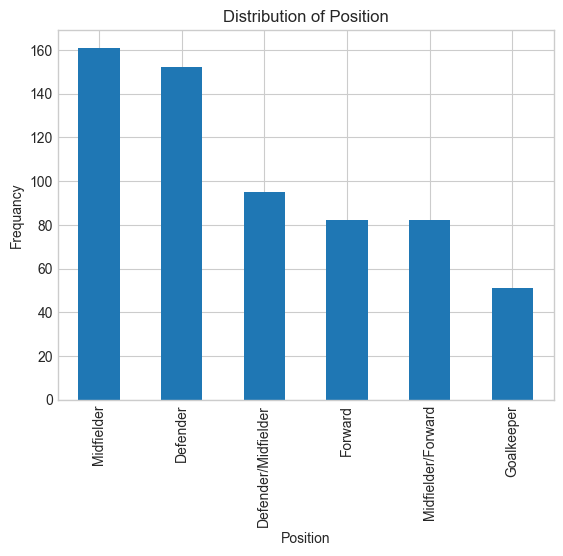

In [35]:
for column in ['Team','Position']:
    ax=df[column].value_counts().plot(kind='bar',title=f'Distribution of {column}')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Frequancy')
    plt.show()


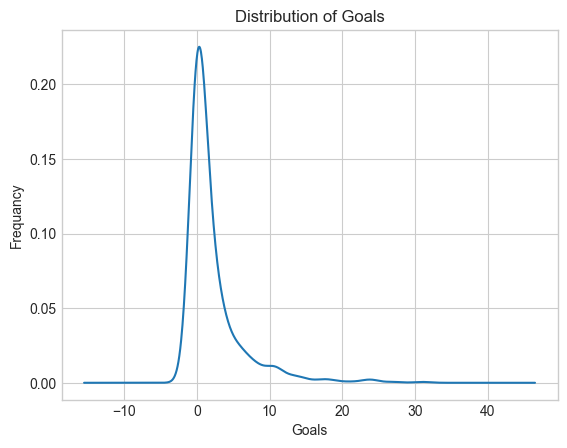

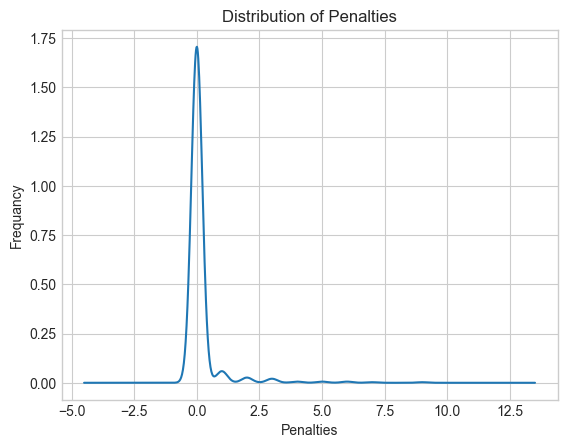

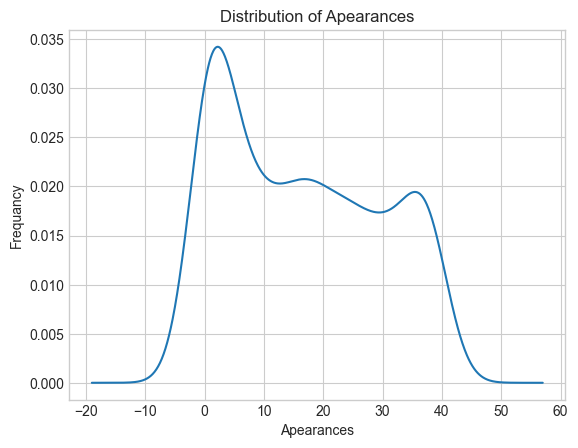

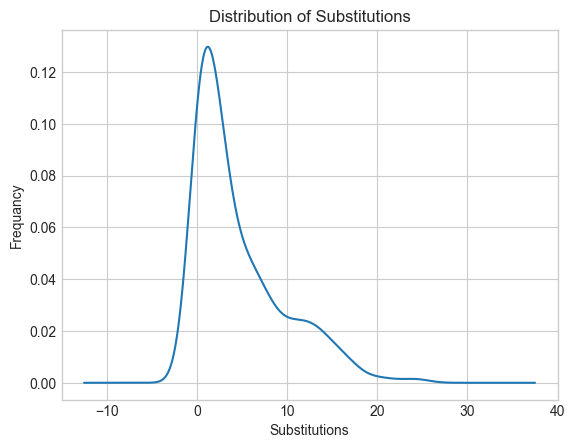

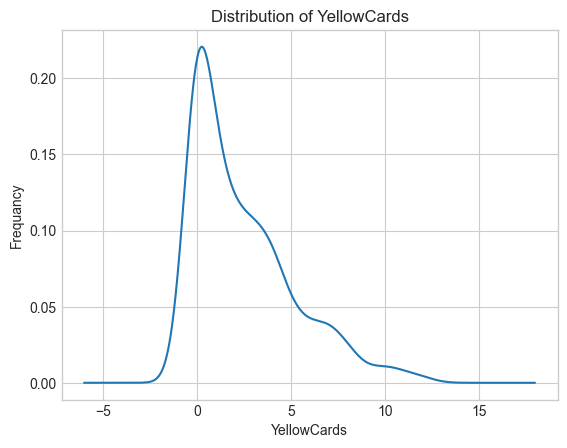

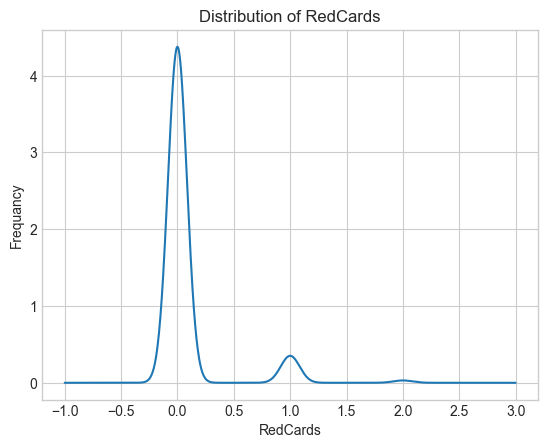

In [36]:
for column in ['Goals','Penalties','Apearances','Substitutions','YellowCards','RedCards']:
    ax=df[column].plot(kind='kde',title=f'Distribution of {column}')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Frequancy')
    plt.show()


<m>

## 2. Analyzing data

<m>

### 2.1 Heatmap

<m>

In [37]:
numeric_columns=df.select_dtypes(include='number')

In [38]:
cor1=numeric_columns.corr()
cor1

,JerseyNo,Goals,Penalties,Apearances,Substitutions,YellowCards,RedCards
JerseyNo,1.000000,-0.198167,-0.114981,-0.493218,-0.157402,-0.331025,-0.123987
Goals,-0.198167,1.000000,0.542281,0.482735,0.336622,0.324037,0.028268
Penalties,-0.114981,0.542281,1.000000,0.236588,0.092332,0.150824,0.026235
Apearances,-0.493218,0.482735,0.236588,1.000000,0.103566,0.690778,0.206002
Substitutions,-0.157402,0.336622,0.092332,0.103566,1.000000,0.064263,-0.065328
YellowCards,-0.331025,0.324037,0.150824,0.690778,0.064263,1.000000,0.204981
RedCards,-0.123987,0.028268,0.026235,0.206002,-0.065328,0.204981,1.000000


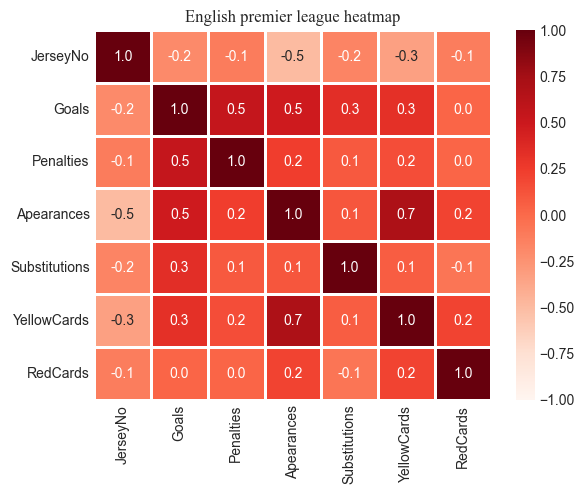

In [39]:
sns.heatmap(cor1,annot=True,vmin=-1,center=0,vmax=1,fmt='.1f',cmap='Reds',edgecolor='Y',linewidth=1)
plt.title('English premier league heatmap',fontfamily='times new roman')
plt.show()

<m>

<m>

In [40]:
app_group=df.groupby('Apearances')
app_group.get_group(df["Apearances"].max())

,Player,Team,Position,JerseyNo,Goals,Penalties,Apearances,Substitutions,YellowCards,RedCards
0,BukayoÂ Saka,Arsenal,Defender/Midfielder,7,12,2,38,3,6,0
31,MattyÂ Cash,Aston Villa,Defender/Midfielder,2,4,0,38,0,8,0
64,PontusÂ Jansson,Brentford,Defender,18,3,0,38,0,7,0
119,RobertÂ SÃ¡nchez,Brighton,Goalkeeper,1,0,0,38,0,3,1
145,NickÂ Pope,Burnley,Goalkeeper,1,0,0,38,0,1,0
155,CÃ©sarÂ Azpilicueta,Chelsea,Defender/Midfielder,28,3,0,38,6,4,0
167,Jorginho,Chelsea,Midfielder,5,9,9,38,7,6,0
174,Marcos Alonso,Chelsea,Defender/Midfielder,3,5,0,38,7,9,0
175,EdouardÂ Mendy,Chelsea,Goalkeeper,16,0,0,38,0,3,0
176,MasonÂ Mount,Chelsea,Midfielder,19,13,1,38,12,4,0


<m>

<m>

In [41]:
goals_list=df["Goals"].tolist()

In [42]:
sum=0
for i in goals_list:
    sum+=i
sum    

1399

<m>

### 2.2 Analysis of the top four teams in the league

<m>

#### 2.2.1 Manchester city

<m>

##### Jersey color

##### Sky blue

<m>

#### 2.2.1.1 Top five scorers in man city 

<m>

In [43]:
mancity=df['Team']=='Manchester City'

In [44]:
citydf=df[mancity]

In [45]:
city_gp=citydf.groupby('Player').Goals.sum().sort_values(ascending=False).head(10)
city_gp

Player
RiyadÂ Mahrez       24
KevinÂ De Bruyne    19
RaheemÂ Sterling    17
PhilÂ Foden         14
Gabriel Jesus       13
Bernardo Silva      13
Ä°lkay GÃ¼ndogan    10
Rodri                7
JackÂ Grealish       6
AymericÂ Laporte     4
Name: Goals, dtype: int64

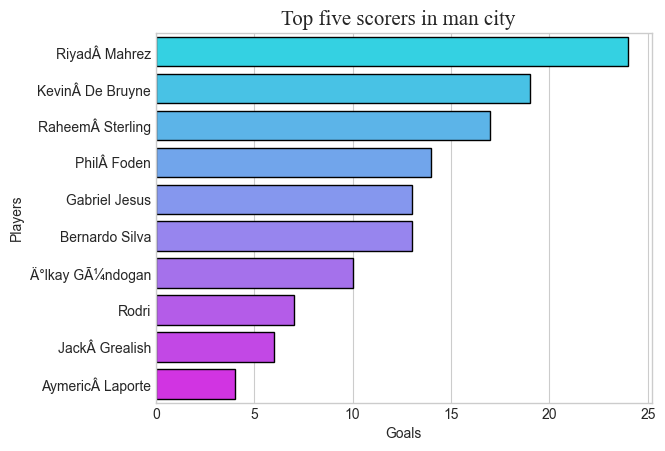

In [46]:
sns.barplot(x=city_gp.values,y=city_gp.index,edgecolor='k',palette='cool')
plt.title('Top five scorers in man city  ',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Goals")
plt.show()

<m>

<m>

#### 2.2.1.2 Players with the most apperances

<n>

In [47]:
mancity_a=citydf.groupby('Player').Apearances.max().sort_values(ascending=False).head(10)
mancity_a

Player
AymericÂ Laporte    38
JoÃ£o Cancelo       38
Bernardo Silva      38
Rodri               38
Ederson             38
KevinÂ De Bruyne    38
RÃºben Dias         37
PhilÂ Foden         36
RaheemÂ Sterling    32
Ä°lkay GÃ¼ndogan    32
Name: Apearances, dtype: int64

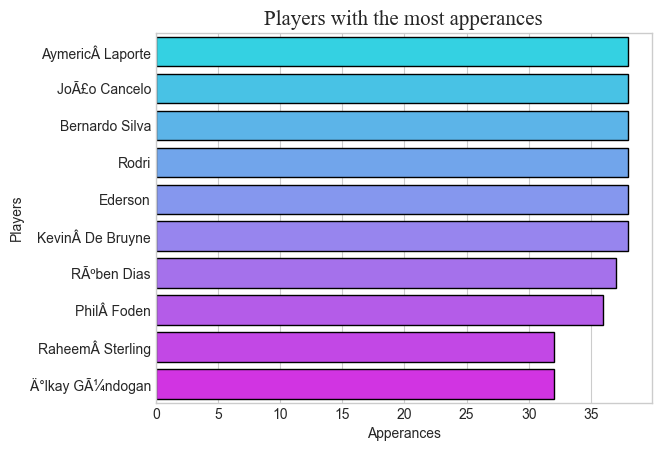

In [48]:
sns.barplot(x=mancity_a.values,y=mancity_a.index,edgecolor='k',palette='cool')
plt.title('Players with the most apperances',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Apperances")
plt.show()

<m>

#### 2.2.1.3  Players with the most yellow cards

<m>

In [49]:
city_y=citydf.groupby('Player').YellowCards.sum().sort_values(ascending=False).head(10)
city_y

Player
JoÃ£o Cancelo       10
Rodri                8
AymericÂ Laporte     7
RÃºben Dias          6
Bernardo Silva       6
Fernandinho          5
Gabriel Jesus        5
Ederson              4
KevinÂ De Bruyne     4
JackÂ Grealish       3
Name: YellowCards, dtype: int64

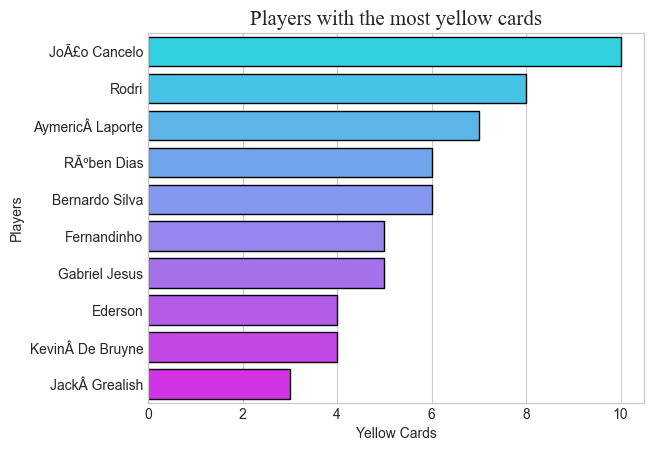

In [50]:
sns.barplot(x=city_y.values,y=city_y.index,edgecolor='k',palette='cool')
plt.title('Players with the most yellow cards',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Yellow Cards")
plt.show()

<m>

#### 2.2.1.4 Man city penalty taker

<m>

In [51]:
city_r=citydf.groupby('Player').Penalties.sum().sort_values(ascending=False).head(1)
city_r

Player
RiyadÂ Mahrez    7
Name: Penalties, dtype: int64

<m>

#### 2.1.1.5  Total number of man city goals

<m>

In [52]:
citydf["Goals"].sum()

146

<M>

#### 2.2.2 Manchester united

<e>

#### Jersey color

#### Red

<m>

#### 2.2.2.1 Top five scorers in man united 

<M>

In [53]:
unitedfilt=df['Team']=='Manchester United'

In [54]:
uniteddf=df[unitedfilt]

In [55]:
united_gp=uniteddf.groupby('Player').Goals.sum().sort_values(ascending=False).head(5)
united_gp

Player
CristianoÂ Ronaldo    24
Bruno Fernandes       10
MasonÂ Greenwood       6
MarcusÂ Rashford       5
JadonÂ Sancho          5
Name: Goals, dtype: int64

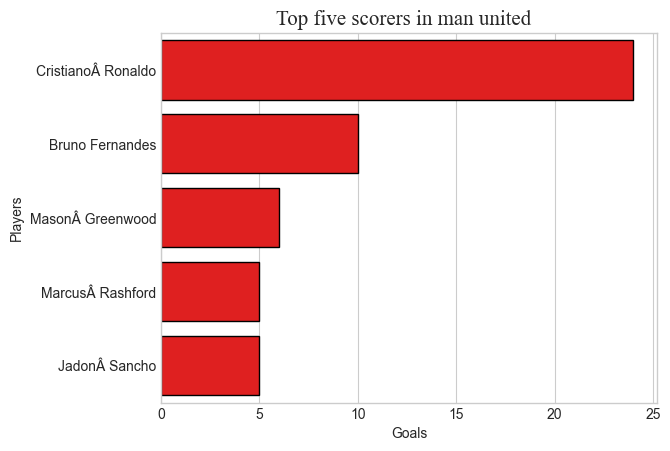

In [56]:
sns.barplot(x=united_gp.values,y=united_gp.index,edgecolor='k',color='r')
plt.title('Top five scorers in man united  ',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Goals")
plt.show()

<m>

#### 2.2.2.2 Players with the most apperances

<m>

In [57]:
united_a=uniteddf.groupby('Player').Apearances.max().sort_values(ascending=False).head(10)
united_a

Player
Bruno Fernandes       38
DavidÂ De Gea         38
ScottÂ McTominay      35
CristianoÂ Ronaldo    35
HarryÂ Maguire        35
VictorÂ LindelÃ¶f     33
Fred                  30
JadonÂ Sancho         27
LukeÂ Shaw            26
RaphaÃ«lÂ Varane      26
Name: Apearances, dtype: int64

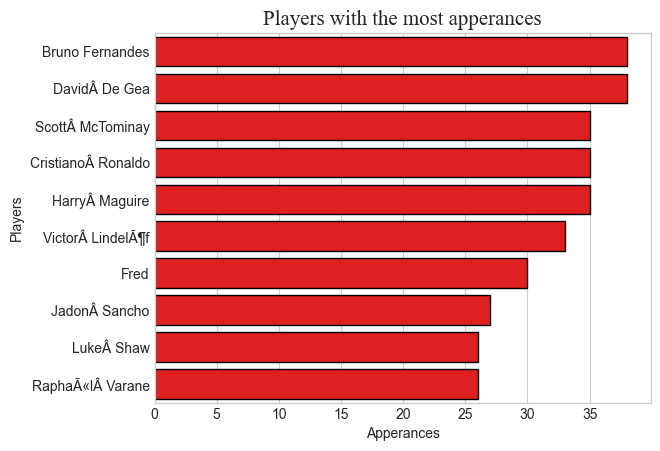

In [58]:
sns.barplot(x=united_a.values,y=united_a.index,edgecolor='k',color='r')
plt.title('Players with the most apperances',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Apperances")
plt.show()

<m>

#### 2.2.2.3  Players with the most yellow cards

<m>

In [59]:
united_y=uniteddf.groupby('Player').YellowCards.sum().sort_values(ascending=False).head(10)
united_y

Player
LukeÂ Shaw            11
ScottÂ McTominay      10
Bruno Fernandes       10
CristianoÂ Ronaldo     9
Fred                   8
PaulÂ Pogba            8
HarryÂ Maguire         7
Diogo Dalot            6
VictorÂ LindelÃ¶f      5
NemanjaÂ MatiÄ‡        5
Name: YellowCards, dtype: int64

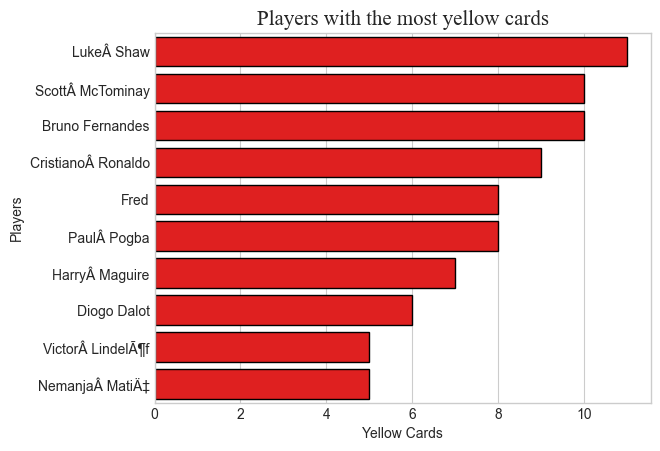

In [60]:
sns.barplot(x=united_y.values,y=united_y.index,edgecolor='k',color='r')
plt.title('Players with the most yellow cards',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Yellow Cards")
plt.show()

<m>

#### 2.2.2.4 Man united penalty taker

<m>

In [61]:
united_r=uniteddf.groupby('Player').Penalties.sum().sort_values(ascending=False).head(1)
united_r

Player
CristianoÂ Ronaldo    3
Name: Penalties, dtype: int64

<m>

#### 2.1.2.5  Total number of man united goals

<M>

In [62]:
uniteddf['Goals'].sum()

70

<m>

#### 2.2.3 Liverpoll

<m>

#### Jersy color

#### Red

<m>

#### 2.2.3.1 Top five scorers in liverpoll 

<m>

In [63]:
livfilt=df["Team"]=="Liverpool"

In [64]:
livdf=df[livfilt]

In [65]:
liver_gp=livdf.groupby('Player').Goals.max().sort_values(ascending=False).head(5)
liver_gp

Player
MohamedÂ Salah      31
SadioÂ ManÃ©        23
Diogo Jota          21
RobertoÂ Firmino    11
TakumiÂ Minamino    10
Name: Goals, dtype: int64

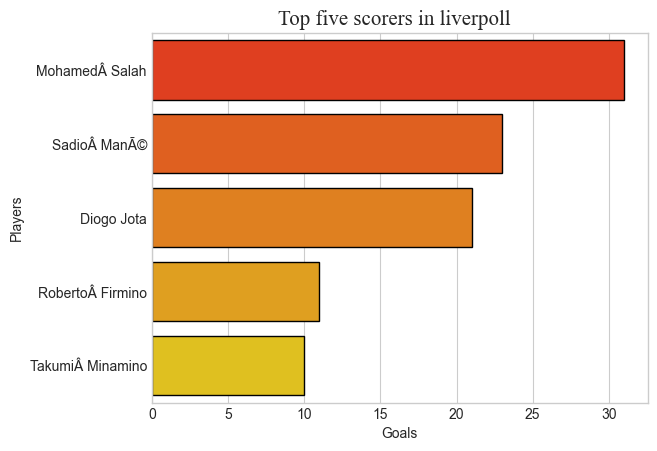

In [66]:
sns.barplot(x=liver_gp.values,y=liver_gp.index,edgecolor='k',palette="autumn")
plt.title('Top five scorers in liverpoll  ',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Goals")
plt.show()

<m>

#### 2.2.3.2 Players with the most apperances

<m>

In [67]:
liver_a=livdf.groupby('Player').Apearances.max().sort_values(ascending=False).head(10)
liver_a

Player
JordanÂ Henderson          38
Diogo Jota                 38
TrentÂ Alexander-Arnold    38
SadioÂ ManÃ©               38
MohamedÂ Salah             38
JoÃ«lÂ Matip               38
Fabinho                    38
VirgilÂ Van Dijk           38
Alisson Becker             38
AndyÂ Robertson            38
Name: Apearances, dtype: int64

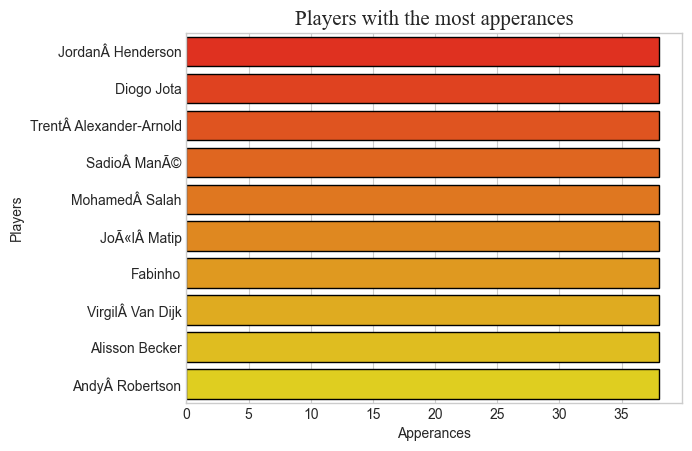

In [68]:
sns.barplot(x=liver_a.values,y=liver_a.index,edgecolor='k',palette='autumn')
plt.title('Players with the most apperances',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Apperances")
plt.show()

<M>

#### 2.2.3.3  Players with the most yellow cards

<m>

In [69]:
liver_y=livdf.groupby('Player').YellowCards.sum().sort_values(ascending=False).head(10)
liver_y

Player
Fabinho                    8
SadioÂ ManÃ©               8
AndyÂ Robertson            7
Diogo Jota                 6
TrentÂ Alexander-Arnold    5
JamesÂ Milner              5
JordanÂ Henderson          4
NabyÂ KeÃ¯ta               4
IbrahimaÂ KonatÃ©          4
VirgilÂ Van Dijk           4
Name: YellowCards, dtype: int64

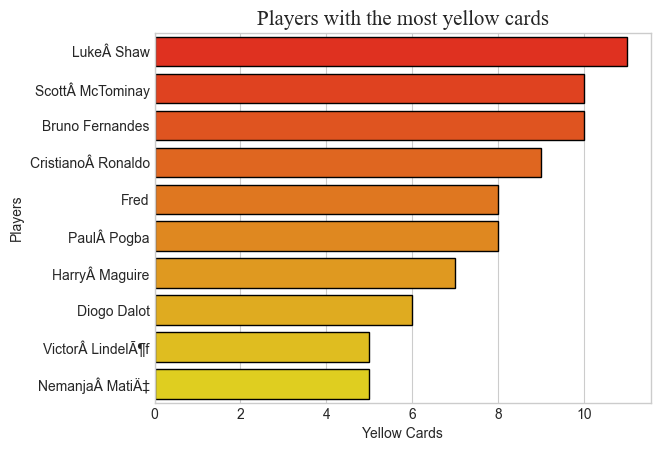

In [70]:
sns.barplot(x=united_y.values,y=united_y.index,edgecolor='k',palette='autumn')
plt.title('Players with the most yellow cards',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Yellow Cards")
plt.show()

<m>

#### 2.2.3.4 Liverpoll penalty taker

<m>

In [71]:
liver_p=livdf.groupby('Player').Penalties.sum().sort_values(ascending=False).head(1)
liver_p

Player
MohamedÂ Salah    6
Name: Penalties, dtype: int64

<M>

#### 2.2.3.5  Total Number Of Liverpoll Goals

<m>

In [72]:
livdf['Goals'].sum()

145

<m>

#### 2.2.4 Chelsea

<M>

#### Jersy color

#### Blue

<m>

#### 2.2.4.1 Top five scorers in chelsea

<m>

In [73]:
chefilt=df['Team']=='Chelsea'

In [74]:
chedf=df[chefilt]

In [75]:
che_gp=chedf.groupby('Player').Goals.max().sort_values(ascending=False).head(5)
che_gp

Player
RomeluÂ Lukaku    15
KaiÂ Havertz      14
MasonÂ Mount      13
TimoÂ Werner      11
Jorginho           9
Name: Goals, dtype: int64

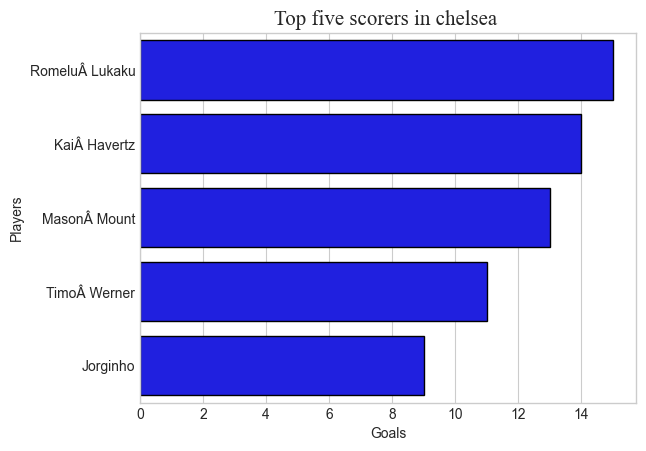

In [76]:
sns.barplot(x=che_gp.values,y=che_gp.index,edgecolor='k',color='b',linewidth=1)
plt.title('Top five scorers in chelsea ',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Goals")
plt.show()

<m>

#### 2.2.4.2 Players with the most apperances

<m>

In [77]:
che_a=chedf.groupby('Player').Apearances.max().sort_values(ascending=False).head(10)
che_a

Player
Jorginho               38
MasonÂ Mount           38
CÃ©sarÂ Azpilicueta    38
EdouardÂ Mendy         38
Marcos Alonso          38
AntonioÂ RÃ¼diger      38
Thiago Silva           38
KaiÂ Havertz           35
MateoÂ KovaÄiÄ‡       33
N'GoloÂ KantÃ©         31
Name: Apearances, dtype: int64

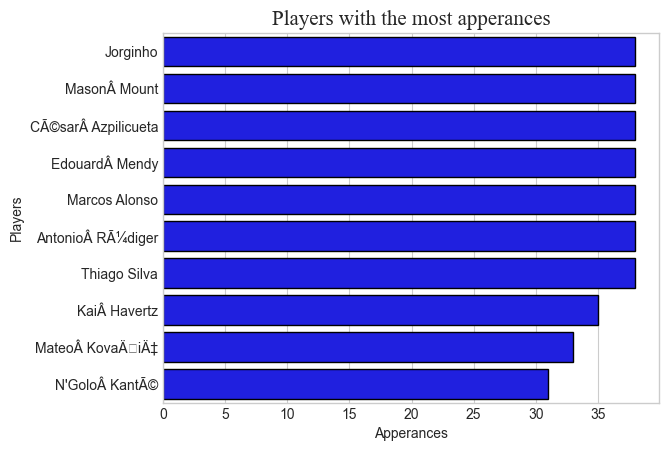

In [78]:
sns.barplot(x=che_a.values,y=che_a.index,edgecolor='k',color='b')
plt.title('Players with the most apperances',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Apperances")
plt.show()

<m>

#### 2.2.4.3  Players with the most yellow cards

<M>

In [79]:
che_y=chedf.groupby('Player').YellowCards.sum().sort_values(ascending=False).head(10)
che_y

Player
AntonioÂ RÃ¼diger      12
Marcos Alonso           9
KaiÂ Havertz            8
ReeceÂ James            7
MateoÂ KovaÄiÄ‡        6
Jorginho                6
HakimÂ Ziyech           5
MasonÂ Mount            4
CÃ©sarÂ Azpilicueta     4
MalangÂ Sarr            4
Name: YellowCards, dtype: int64

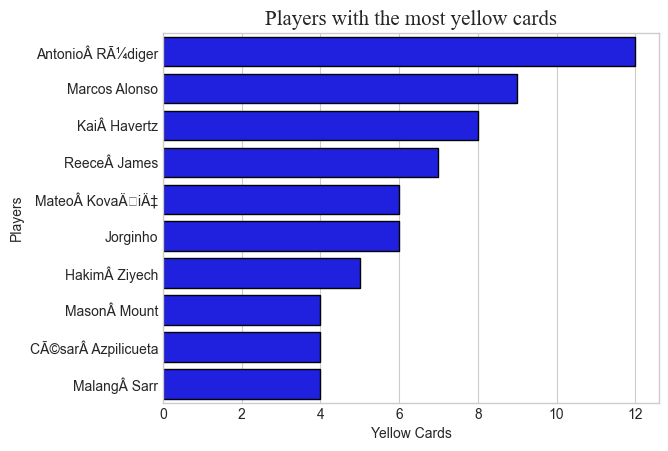

In [80]:
sns.barplot(x=che_y.values,y=che_y.index,edgecolor='k',color='b')
plt.title('Players with the most yellow cards',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Yellow Cards")
plt.show()

<m>

#### 2.2.4.4 Chelsea Penalty Taker

<m>

In [81]:
chept=chedf.groupby('Player').Penalties.sum().sort_values(ascending=False).head(1)
chept

Player
Jorginho    9
Name: Penalties, dtype: int64

<M>

#### 2.1.3.5  Total Number Of Chelsea Goals

<m>

In [82]:
chedf['Goals'].sum()

119

<M>

### 2.3 Teams with the most penelties

<M>

In [83]:
tp=df.groupby('Team').Penalties.sum().sort_values(ascending=False).head(10)
tp

Team
Chelsea              13
Manchester City      11
Liverpool             9
Brentford             9
Everton               6
Tottenham Hotspur     6
Arsenal               6
Crystal Palace        6
Leeds United          5
Southampton           5
Name: Penalties, dtype: int64

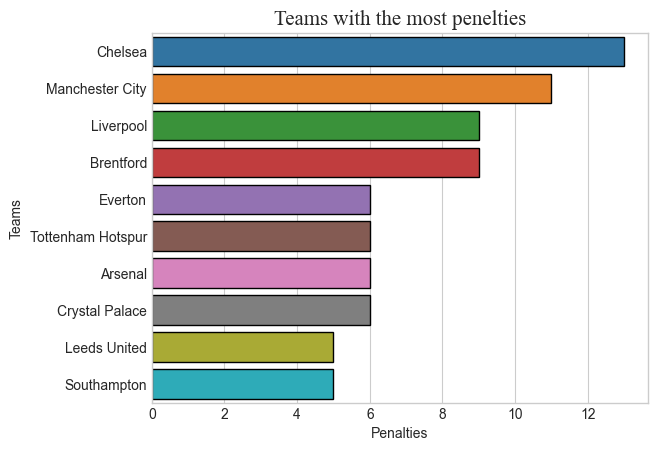

In [84]:
sns.barplot(x=tp.values,y=tp.index,edgecolor='k',palette='tab10')
plt.title('Teams with the most penelties',fontfamily='times new roman',fontsize=15)
plt.ylabel("Teams")
plt.xlabel("Penalties")
plt.show()

<m>

### 2.4  Number of players in each team

<m>

In [85]:
teamplayer=df.groupby("Team")["Player"].nunique().sort_values(ascending=False)
teamplayer

Team
Liverpool            37
Everton              36
Aston Villa          36
Brighton             35
Manchester United    35
Watford              34
Chelsea              33
Manchester City      33
Tottenham Hotspur    31
Brentford            31
Leicester City       31
West Ham United      30
Leeds United         29
Newcastle United     29
Norwich City         29
Arsenal              28
Wolverhampton        28
Southampton          27
Crystal Palace       26
Burnley              25
Name: Player, dtype: int64

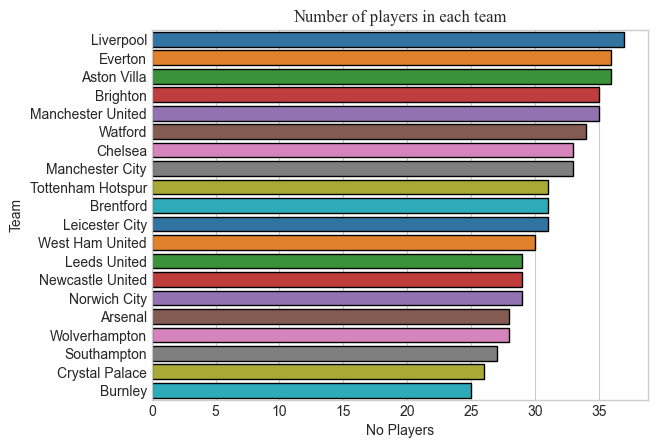

In [86]:
sns.barplot(x=teamplayer.values,y=teamplayer.index,edgecolor='k',palette='tab10')
plt.title('Number of players in each team',fontfamily='times new roman')
plt.xlabel('No Players')
plt.ylabel('Team')
plt.show()

<m>

### 2.5 Players with the most appearances

<m>

In [87]:
app_gp=df.groupby('Player').Apearances.sum().sort_values(ascending=False).head(10)
app_gp

Player
JoÃ£o Cancelo         38
EdouardÂ Mendy        38
JordanÂ Henderson     38
JarrodÂ Bowen         38
JamesÂ Ward-Prowse    38
JamesÂ Maddison       38
IllanÂ Meslier        38
HugoÂ Lloris          38
HarveyÂ Barnes        38
HarryÂ Kane           38
Name: Apearances, dtype: int64

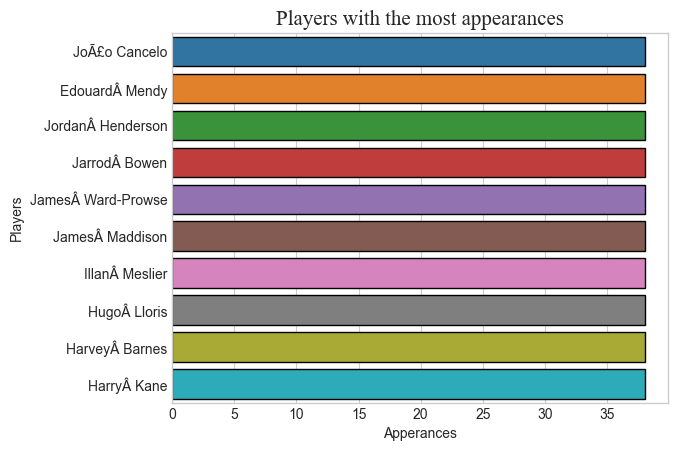

In [88]:
sns.barplot(x=app_gp.values,y=app_gp.index,edgecolor='k',palette='tab10')
plt.title('Players with the most appearances',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("Apperances")
plt.show()

<M>

### 2.6  Players with the most red cards

<m>

In [89]:
red_c=df.groupby('Player').RedCards.sum().sort_values(ascending=False).head(10)
red_c

Player
AaronÂ Cresswell    2
EzriÂ Konsa         2
GranitÂ Xhaka       2
RaÃºlÂ JimÃ©nez     2
SergiÂ CanÃ³s       1
AymericÂ Laporte    1
BenÂ Gibson         1
LukeÂ Ayling        1
ThomasÂ Partey      1
AyozeÂ PÃ©rez       1
Name: RedCards, dtype: int64

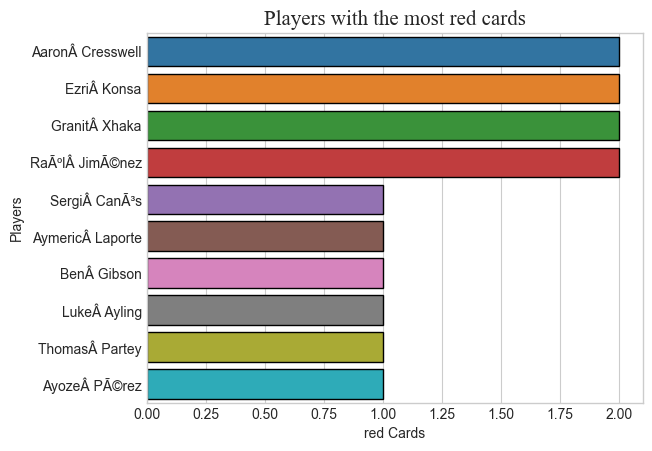

In [90]:
sns.barplot(x=red_c.values,y=red_c.index,edgecolor='k',palette='tab10')
plt.title('Players with the most red cards',fontfamily='times new roman',fontsize=15)
plt.ylabel("Players")
plt.xlabel("red Cards")
plt.show()

<m>

### 2.7 Top scorer of the league

<m>

In [91]:
top_scorer_gp=df.groupby('Goals')
top_scorer_gp.get_group(31)

,Player,Team,Position,JerseyNo,Goals,Penalties,Apearances,Substitutions,YellowCards,RedCards
341,MohamedÂ Salah,Liverpool,Midfielder/Forward,11,31,6,38,6,1,0


<n>

### 2.8 Total number of goals in the season

<m>

In [92]:
glist=df['Goals'].tolist()

In [93]:
sum=0
for i in glist:
    sum+=i
sum

1399

<m>

### 2.9 Teams with the most goals in the league

<M>

In [94]:
team_goals=df.groupby('Team')['Goals'].sum().sort_values(ascending=False).head(10)
team_goals

Team
Manchester City      146
Liverpool            145
Chelsea              119
Leicester City        99
Tottenham Hotspur     85
West Ham United       83
Arsenal               76
Manchester United     70
Brentford             62
Crystal Palace        60
Name: Goals, dtype: int64

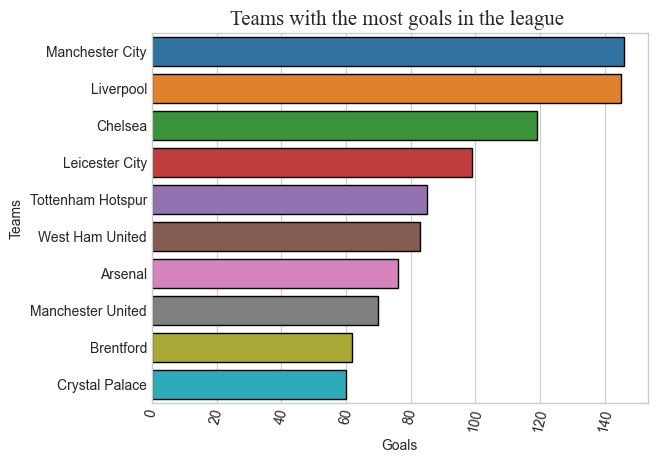

In [95]:
sns.barplot(x=team_goals.values,y=team_goals.index,edgecolor='k',palette='tab10')
plt.title('Teams with the most goals in the league ',fontfamily="times new roman",fontsize=15)
plt.ylabel('Teams')
plt.xlabel('Goals')
plt.xticks(rotation=77)
plt.show()

<m>

### 2.10 Positions with the most goals

<m>

In [96]:
pg=df.groupby('Position').Goals.sum().sort_values(ascending=False).head(10)
pg

Position
Midfielder/Forward     491
Forward                347
Midfielder             317
Defender               130
Defender/Midfielder    114
Goalkeeper               0
Name: Goals, dtype: int64

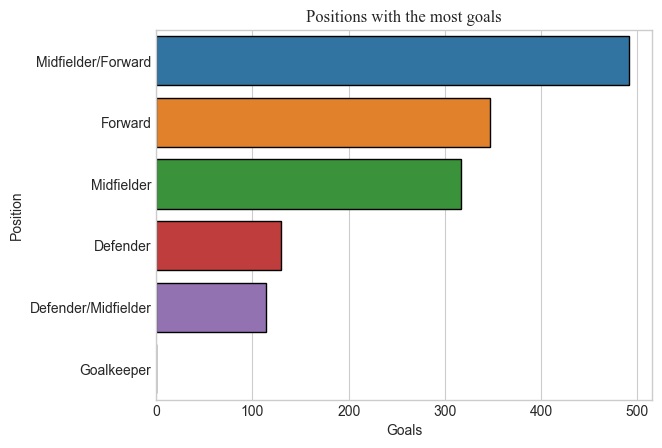

In [97]:
sns.barplot(x=pg.values,y=pg.index,edgecolor='k',palette='tab10')
plt.title('Positions with the most goals',fontfamily='times new roman')
plt.xlabel('Goals')
plt.ylabel('Position')
plt.show()

<m>

### 2.11 Position with the most yellow cards

<m>

In [98]:
py=df.groupby('Position').YellowCards.sum().sort_values(ascending=False).head(10)
py

Position
Defender               433
Midfielder             432
Defender/Midfielder    282
Midfielder/Forward     193
Forward                148
Goalkeeper              43
Name: YellowCards, dtype: int64

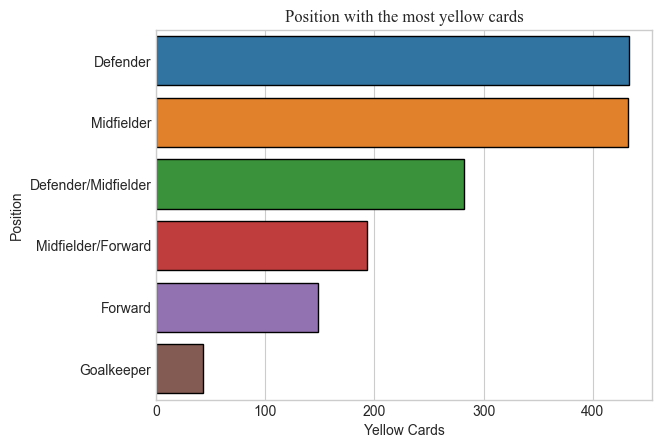

In [99]:
sns.barplot(x=py.values,y=py.index,edgecolor='k',palette='tab10')
plt.title('Position with the most yellow cards',fontfamily='times new roman')
plt.xlabel('Yellow Cards')
plt.ylabel('Position')
plt.show()

<m>

### 2.12 Position with the most red cards

<m>

In [100]:
pr=df.groupby('Position').RedCards.sum().sort_values(ascending=False).head(10)
pr

Position
Defender               21
Defender/Midfielder    13
Forward                 7
Midfielder              7
Midfielder/Forward      5
Goalkeeper              1
Name: RedCards, dtype: int64

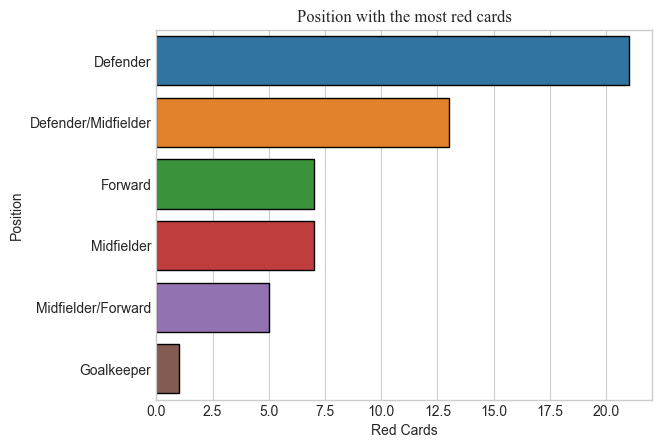

In [101]:
sns.barplot(x=pr.values,y=pr.index,edgecolor='k',palette='tab10')
plt.title('Position with the most red cards',fontfamily='times new roman')
plt.xlabel('Red Cards')
plt.ylabel('Position')
plt.show()

<m>

### 2.13 Relation between apperances and goals

<m>

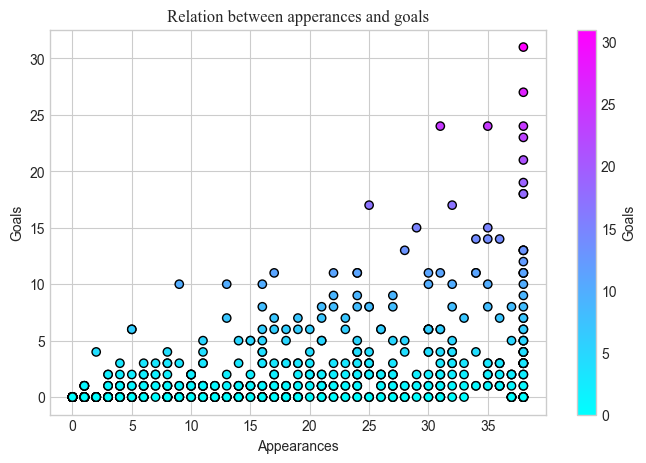

In [102]:
plt.figure(figsize=(8,5))
plt.scatter(df['Apearances'],df['Goals'],edgecolor='k',cmap='cool',c=df['Goals'])
plt.title('Relation between apperances and goals',fontfamily='times new roman')
plt.xlabel('Appearances')
plt.ylabel('Goals')
cbar=plt.colorbar()
cbar.set_label('Goals')
plt.show()

<m>

### 2.14 Relation between apperances and yellow cards

<m>

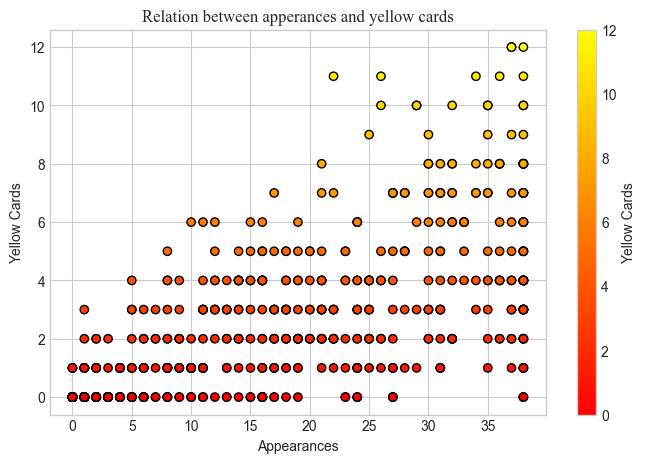

In [103]:
plt.figure(figsize=(8,5))
plt.scatter(df['Apearances'],df['YellowCards'],edgecolor='k',cmap='autumn',c=df['YellowCards'])
plt.title('Relation between apperances and yellow cards',fontfamily='times new roman')
plt.xlabel('Appearances')
plt.ylabel('Yellow Cards')
cbar=plt.colorbar()
cbar.set_label('Yellow Cards')
plt.show()

<m>

# END :)

<m>